# 1. Import Libraries

In [1]:
import tensorflow as tf
import os
import cv2
import random

# To determine the type of image
import imghdr

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D
from tensorflow.keras.models import Sequential

# To compute evaluation metric
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [2]:
# Defining supported image file type
image_extension = ['jpeg', 'jpg', 'png', 'bmp']

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.1 os.listdir() </b></p>
</div>

```python
os.listdir(path=None)
```

**<span style="color:#023e8a;"> Return a list containing the names of the files in the directory. </span>**


In [3]:
os.listdir("../input/impression-data/data/")

['sad', 'happy']

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.2 os.path.join() </b></p>
</div>

```python
os.path.join(a, *p)
```

**<span style="color:#023e8a;"> Join two or more pathname components. </span>**

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.3 imghdr.what() </b></p>
</div>


```python
imghdr.what(file, h=None)
```

**<span style="color:#023e8a;">Tests the image data contained in the file named by file, and returns a string describing the image type</span>**

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.4 Exception Handling </b></p>
</div>

* `try block` : There can be **errors** in this block
* `exception block` : Do this to **handle exception**; if the try block throws an error, this block is executed 

```python
try:
    # code for `try` block 

except:
    # code for `exception` block
    
```

In [4]:
datasets_dir = "../input/impression-data/data"

for imageClassName in os.listdir(datasets_dir):
    for individualImage in os.listdir(os.path.join(datasets_dir, imageClassName)):
        imagePath = os.path.join(datasets_dir, imageClassName, individualImage)
        try:
            image = cv2.imread(imagePath)
            imageTag = imghdr.what(imagePath)
            if imageTag not in image_extension:
                print("Image Extension is not right {}".format(imagePath))
                os.remove(imagePath)
                
        except Exception as e:
            print("The main issue is {} here. Please solve the issue".format(imagePath))

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.5 tensorflow.keras.utils.image_dataset_from_directory() </b></p>
</div>

```python
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
```

**<span style="color:#023e8a;"> Generates a `tf.data.Dataset` from image files in a directory. </span>**

* If directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

* Then calling `image_dataset_from_directory(main_directory, labels='inferred')`
will return a `tf.data.Dataset` that yields **batches of images** from
the subdirectories `class_a` and `class_b`, together with **labels
0 and 1** (0 corresponding to `class_a` and 1 corresponding to `class_b`).

In [5]:
datasets = tf.keras.utils.image_dataset_from_directory(datasets_dir)

Found 305 files belonging to 2 classes.


2022-11-17 09:40:18.039871: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
datasets

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
# Converting the tensor to numpy object
datasets_iterate = datasets.as_numpy_iterator()

In [8]:
type(datasets_iterate)

tensorflow.python.data.ops.dataset_ops._NumpyIterator

In [9]:
# To return the next item from the iterator
datasets_batch = datasets_iterate.next()

2022-11-17 09:40:18.220500: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.6 enumerate() method </b></p>
</div>

```python
languages = ['Python', 'Java', 'JavaScript']

enumerate_prime = enumerate(languages)

# convert enumerate object to list
print(list(enumerate_prime))

# Output: [(0, 'Python'), (1, 'Java'), (2, 'JavaScript')]
```
**<span style="color:#023e8a;"> Adds a counter to an iterable and returns the enumerate object. </span>**


<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.7 Random Image Visualization </b></p>
</div>

In [10]:
def randomImageShow():
    num = random.randint(0,15)
    for i in range(4):
        fig, ax = plt.subplots(ncols=4, figsize=(10, 10))
        for idx, image in enumerate(datasets_batch[0][num : (num + 4)]):
            ax[idx].imshow(image.astype('int'))
            ax[idx].title.set_text(datasets_batch[1][idx])
        num += 4

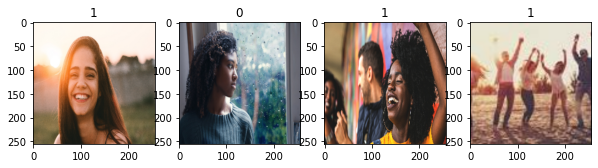

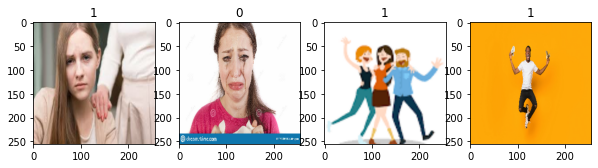

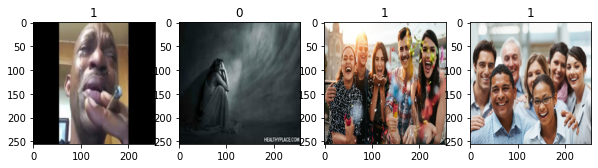

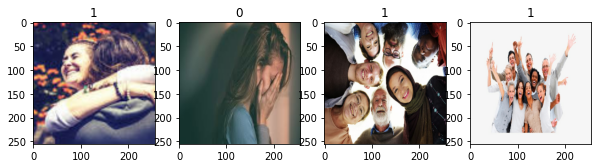

In [11]:
randomImageShow()

# 3. Processing Dataset

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.1 map() function </b></p>
</div>

```python
datasets.map(map_func, num_parallel_calls=None, deterministic=None)
```
**<span style="color:#023e8a;"> Maps `map_func` across the elements of this dataset. </span>**

* This transformation applies `map_func` to each element of this dataset, and
returns a new dataset containing the **transformed elements**, in the same
order as they appeared in the input. 

* For example, `map` can be used for adding 1 to each element:

```python
dataset = Dataset.range(1,6) # ==> [1, 2, 3, 4, 5]
dataset = dataset.map(lambda x : x + 1)
list(dataset.as_numpy_iterator())

[2, 3, 4, 5, 6]
```

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.2 lambda() function </b></p>
</div>

* In Python, a function that is `defined without a name`, is an **anonymous** function or **lambda** function.
* **Syntax**:
```python
lambda arguments: expression
```
* `Lambda` functions can have **any number of arguments** but **only one expression**
* Example :
```python
# lambda function to double the input value
double = lambda x: x * 2
print(double(5))
10
```

In [12]:
# Converting Image Pixels to range(0,1)
datasetsScalling = datasets.map(lambda x,y : (x/255, y))

In [13]:
datasetsScalling.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


(array([[[[0.49116114, 0.30292585, 0.15390626],
          [0.5161382 , 0.3293505 , 0.17984834],
          [0.53574604, 0.35927543, 0.20633425],
          ...,
          [0.29391083, 0.21940105, 0.23508732],
          [0.24307598, 0.16856618, 0.18425246],
          [0.27682292, 0.20231311, 0.21799938]],
 
         [[0.52402365, 0.33578834, 0.18676874],
          [0.53643703, 0.3496493 , 0.20014717],
          [0.5396765 , 0.3632059 , 0.21026474],
          ...,
          [0.31105575, 0.23791249, 0.25314325],
          [0.27530074, 0.20663461, 0.22037299],
          [0.31227103, 0.23803453, 0.2536297 ]],
 
         [[0.55457395, 0.36633867, 0.21731906],
          [0.5559251 , 0.36913744, 0.21936762],
          [0.54332685, 0.3668563 , 0.21173987],
          ...,
          [0.33759516, 0.26831484, 0.2823323 ],
          [0.32296026, 0.26012284, 0.27223626],
          [0.3591628 , 0.2883092 , 0.30279163]],
 
         ...,
 
         [[0.47971773, 0.39954004, 0.33287334],
          [0.51652

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.3 Spilitting Data </b></p>
</div>

In [14]:
# Splilitting data into train, val, test as (70, 20, 10) ratio
train_cat = int(len(datasetsScalling) * 0.7)
test_cat = int(len(datasetsScalling) * 0.2)
val_cat = int(len(datasetsScalling) * 0.1)

In [15]:
train = datasetsScalling.take(train_cat)
valid = datasetsScalling.skip(train_cat).take(val_cat)
test = datasetsScalling.skip(train_cat + val_cat).take(test_cat)

# 4. Build a CNN Model

In [16]:
model = Sequential()

# Input Layer
model.add(Conv2D(16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# 1st Hidden Layer
model.add(Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

# 2nd Hidden Layer
model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

# Bridge or Connected Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [18]:
model.compile(optimizer='adam',
             loss='BinaryCrossentropy',
             metrics=['accuracy'])

In [19]:
# Creating directory to save log data
log_dir = "../working/logs"

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.1 tensorflow.keras.callbacks.TensorBoard() </b></p>
</div>

```python
tf.keras.callbacks.TensorBoard(*args, **kwargs)
```

**<span style="color:#023e8a;"> Enable visualizations for TensorBoard. </span>**

* **TensorBoard** is a `visualization tool` provided with `TensorFlow`.

* This callback logs events for TensorBoard, including:

    * Metrics summary plots
    * Training graph visualization
    * Activation histograms
    * Sampled profiling
    
* **log_dir** : the `path of the directory` where to `save the log files` to be parsed by `TensorBoard`

**<span style="color:#023e8a;"> When used in `Model.evaluate`, in addition to epoch summaries, there will be
a summary that records evaluation metrics vs `Model.optimizer.iterations`
written. The metric names will be prepended with `evaluation`, with
`Model.optimizer.iterations` being the step in the visualized TensorBoard.
 </span>**


In [20]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

2022-11-17 09:40:25.946720: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-17 09:40:25.946775: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-17 09:40:25.948223: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [21]:
history = model.fit(train,
                   epochs=20,
                   validation_data=valid,
                   callbacks=[tensorboard])

Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/7 [===>..........................] - ETA: 24s - loss: 0.6956 - accuracy: 0.5625

2022-11-17 09:40:30.071691: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-17 09:40:30.071941: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/7 [=======>......................] - ETA: 2s - loss: 1.9740 - accuracy: 0.5469 

2022-11-17 09:40:30.512889: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-17 09:40:30.520012: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-17 09:40:30.534508: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_17_09_40_30

2022-11-17 09:40:30.536260: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ../working/logs/train/plugins/profile/2022_11_17_09_40_30/ac06d07fc65e.trace.json.gz
2022-11-17 09:40:30.551555: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../working/logs/train/plugins/profile/2022_11_17_09_40_30

2022-11-17 09:40:30.552538: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to ../working/logs/train/plugins/profile/2022_11_17_09_40_30/ac06d07fc65e.memory_p

7/7 [==============================] - ETA: 0s - loss: 1.3782 - accuracy: 0.5402

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 10s 920ms/step - loss: 1.3782 - accuracy: 0.5402 - val_loss: 0.7437 - val_accuracy: 0.4688
Epoch 2/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.6519 - accuracy: 0.5848

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 867ms/step - loss: 0.6519 - accuracy: 0.5848 - val_loss: 0.6934 - val_accuracy: 0.5312
Epoch 3/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.5795 - accuracy: 0.7098

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 843ms/step - loss: 0.5795 - accuracy: 0.7098 - val_loss: 0.4783 - val_accuracy: 0.8125
Epoch 4/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.4875 - accuracy: 0.8080

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 845ms/step - loss: 0.4875 - accuracy: 0.8080 - val_loss: 0.4196 - val_accuracy: 0.8125
Epoch 5/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.8661

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 864ms/step - loss: 0.3783 - accuracy: 0.8661 - val_loss: 0.3830 - val_accuracy: 0.8438
Epoch 6/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.2910 - accuracy: 0.8973

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 834ms/step - loss: 0.2910 - accuracy: 0.8973 - val_loss: 0.2831 - val_accuracy: 0.9062
Epoch 7/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.2445 - accuracy: 0.9152

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 837ms/step - loss: 0.2445 - accuracy: 0.9152 - val_loss: 0.1543 - val_accuracy: 1.0000
Epoch 8/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9598

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 862ms/step - loss: 0.1434 - accuracy: 0.9598 - val_loss: 0.0875 - val_accuracy: 1.0000
Epoch 9/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9732

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 841ms/step - loss: 0.0910 - accuracy: 0.9732 - val_loss: 0.1182 - val_accuracy: 0.9688
Epoch 10/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9866

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 923ms/step - loss: 0.0656 - accuracy: 0.9866 - val_loss: 0.0773 - val_accuracy: 0.9688
Epoch 11/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9866

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 877ms/step - loss: 0.0415 - accuracy: 0.9866 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 12/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 847ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 13/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 837ms/step - loss: 0.0327 - accuracy: 0.9911 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 14/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 832ms/step - loss: 0.0241 - accuracy: 0.9911 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 15/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 858ms/step - loss: 0.0198 - accuracy: 0.9955 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 16/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 839ms/step - loss: 0.0304 - accuracy: 0.9955 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 17/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9866

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 830ms/step - loss: 0.0403 - accuracy: 0.9866 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 18/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 866ms/step - loss: 0.0378 - accuracy: 0.9911 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 19/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 851ms/step - loss: 0.0175 - accuracy: 0.9911 - val_loss: 0.0331 - val_accuracy: 0.9688
Epoch 20/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


7/7 [==============================] - 8s 847ms/step - loss: 0.0191 - accuracy: 0.9955 - val_loss: 0.0011 - val_accuracy: 1.0000


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 5. Performance Evaluation

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.1 Model Performance Visualization </b></p>
</div>

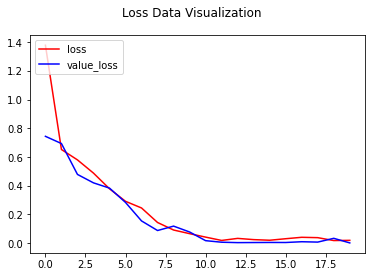

In [23]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='value_loss')
plt.suptitle("Loss Data Visualization")
plt.legend(loc="upper left")
plt.show()

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.2 Precision() </b></p>
</div>

```python
Precision(*args, **kwargs)
```
**<span style="color:#023e8a;"> Computes the precision of the predictions with respect to the labels. </span>**    


* The metric creates two local variables, `true_positives` and `false_positives`
that are used to compute the `precision`. 
* This value is ultimately returned as
`precision`, that simply divides `true_positives`
by the `sum` of `true_positives` and `false_positives`

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.3 Recall() </b></p>
</div>

```python
Recall(*args, **kwargs)
```
**<span style="color:#023e8a;"> Computes the recall of the predictions with respect to the labels. </span>**

* This metric creates two local variables, `true_positives` and
`false_negatives`, that are used to compute the `recall`. 
* This value is ultimately returned as `recall`, an that simply divides
`true_positives` by the sum of `true_positives` and `false_negatives`.

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.4 BinaryAccuracy() </b></p>
</div>

```python
BinaryAccuracy(*args, **kwargs)
```
**<span style="color:#023e8a;"> Calculates how often predictions match binary labels. </span>**
* This metric creates two local variables, `total` and `count` that are used to
compute the **frequency** with which `y_pred` matches `y_true`. 
* This `frequency` is ultimately returned as `binary accuracy`: that simply **divides** `total` by `count`.


In [24]:
precisionData = Precision()
recallData = Recall()
binary_accuracy_data = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    precisionData(y, y_pred)
    recallData(y, y_pred)
    binary_accuracy_data(y, y_pred)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [26]:
print(precisionData.result(), "\n", recallData.result(), "\n", binary_accuracy_data.result())

tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32) 
 tf.Tensor(1.0, shape=(), dtype=float32)


# 6. Prediction on Unseen Data
<center><div style="color:white;
            height: 30px;
            width: 250px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>6.1 Test Sample - 1 </b></p>
</div>
</center>

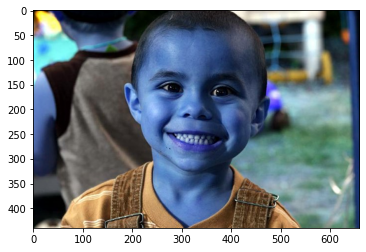

In [27]:
testImageData_1 = cv2.imread("../input/test-data/Smile.jpg")
plt.imshow(testImageData_1)
plt.show()

In [28]:
testImageData_1.shape

(440, 660, 3)

In [29]:
resizeImageData_1 = tf.image.resize(testImageData_1, (256, 256))

testImageData_1Predict = model.predict(np.expand_dims(resizeImageData_1/255, 0))

testImageData_1Predict

array([[0.48380277]], dtype=float32)

In [30]:
if testImageData_1Predict < 0.5:
    print('Happy Image')
else:
    print('Sad Image')

Happy Image


<center><div style="color:white;
            height: 30px;
            width: 250px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>6.2 Test Sample - 2 </b></p>
</div>
</center>

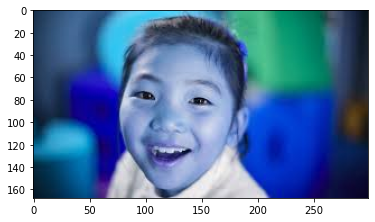

In [31]:
testImageData_2 = cv2.imread("../input/test-data/images (18).jfif")
plt.imshow(testImageData_2)
plt.show()

In [32]:
testImageData_2.shape

(168, 299, 3)

In [33]:
resizeImageData_2 = tf.image.resize(testImageData_2, (256, 256))

testImageData_2Predict = model.predict(np.expand_dims(resizeImageData_2/255, 0))

testImageData_2Predict

array([[0.5344881]], dtype=float32)

In [34]:
if testImageData_2Predict < 0.5:
    print('Happy Image')
else:
    print('Sad Image')

Sad Image


<center><div style="color:white;
            height: 30px;
            width: 250px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>6.3 Test Sample - 3 </b></p>
</div>
</center>

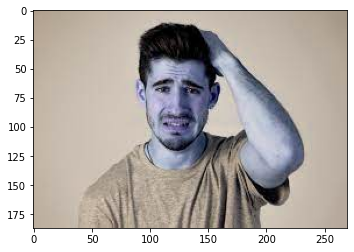

In [35]:
testImageData_3 = cv2.imread("../input/test-data/Sad.jfif")
plt.imshow(testImageData_3)
plt.show()

In [36]:
testImageData_3.shape

(187, 270, 3)

In [37]:
resizeImageData_3 = tf.image.resize(testImageData_3, (256, 256))

testImageData_3Predict = model.predict(np.expand_dims(resizeImageData_3/255, 0))

testImageData_3Predict

array([[0.9880009]], dtype=float32)

In [38]:
if testImageData_3Predict < 0.5:
    print('Happy Image')
else:
    print('Sad Image')

Sad Image


# 6. Save Model

In [39]:
# Import load_model
from tensorflow.keras.models import load_model

In [40]:
# Specifying path for model saving
modelsPath = "../working/models"

In [41]:
# Model Saving to specified path as "ModelInfo.h5"
model.save(os.path.join(modelsPath, "ModelInfo.h5"))

# 7. Working with saved Model

In [42]:
# Load saved model
modelData = load_model("../working/models/ModelInfo.h5")

In [43]:
# Checking whether saved model is working or not
modelData.predict(np.expand_dims(resizeImageData_1/255, 0))

array([[0.48380277]], dtype=float32)

**<span style="color:#023e8a;"> We can see that predicted probability by both `notebook model` and `saved model` on `Test Sample - 1` is `0.48380277`. That means, saved model is working perfectly. </span>**

# 8. Remarks

* **<span style="color:#023e8a;">We can observe, Test Sample - 1 and Test Sample - 2 are both Happy Image and Test Sample - 3 is sad Image</span>**
* **<span style="color:#023e8a;">But model predicts Test Sample - 1, Test Sample - 2, and Test Sample - 3 as Happy Image, Sad Image,and Sad Image respectively</span>**
* **<span style="color:#023e8a;">That means, the model is biased towards Sad Image</span>**
* **<span style="color:#023e8a;">High Bias can be solved through:</span>**
    * **<span style="color:#023e8a;">Adding more input features</span>**
    * **<span style="color:#023e8a;">Adding more complexity by introducing polynomial features</span>**
    * **<span style="color:#023e8a;">Decreasing Regularization term</span>**

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Thanks for reading! Please feel free to provide suggestions or feedbacks :)</span></center>**